# Fundamentals of Data Science
Winter Semester 2021

## Prof. Fabio Galasso, Guido D'Amely, Alessandro Flaborea, Luca Franco, Muhammad Rameez Ur Rahman and Alessio Sampieri
<galasso@di.uniroma1.it>, <damely@di.uniroma1.it>, <flaborea@di.uniroma1.it>, <franco@diag.uniroma1.it>, <rahman@di.uniroma1.it>, <alessiosampieri27@gmail.com>


## Exercise 2: Classification



In Exercise 2, you will re-derive and implement logistic regression and optimize the parameters with Gradient Descent and with the Newton's method. Also, in this exercise you will re-derive and implement Gassian Discriminant Analysis.
We will use datasets generated from the make_classification function from the SkLearn library. Its first output contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.
Submit it by sending an email to galasso@di.uniroma1.it, flaborea@di.uniroma1.it, franco@diag.uniroma1.it and alessiosampieri27@gmail.com  by Wednesday November 17th 2021, 23:59.

## Notation

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

Let's start by setting up our Python environment and importing the required libraries:

In [ ]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
from sklearn.datasets import make_classification
import seaborn as sns

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

## Question 1: Logistic Regression with Gradient Ascent **(10 Points)**

### Code and Theory 


#### Exercise 1.a **(3 Points)** Equations for the log likelihood, its gradient, and the gradient ascent update rule.

Write and simplify the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

Question: Are we looking for a local minimum or a local maximum using the gradient ascent rule? 

################# Do not write above this line #################

The likelihood function is defined as follows:

$L(\theta) = P(\vec{y} | X , \theta )$

= $\prod_{i=1}^{m} P( y^i | x^i , \theta )$

= $\prod_{i=1}^{m} \frac{1}{\sqrt{2*\pi}*\sigma}* \exp{(-  \frac{(y^i-\theta^t x^i)^2}{2 \sigma^2})}$

The log-likelihood function is defined as follows :

$l(\theta) = \log{( L(\theta) ) }$

= $\log{ ( \prod_{i=1}^{m} \frac{1}{\sqrt{2*\pi}*\sigma}* \exp{(-  \frac{(y^i-\theta^t x^i)^2}{2 \sigma^2})} ) } $

= $ \sum_{i=1}^{m} [ \log{\frac{1}{\sqrt{2*\pi}*\sigma} + \log{ \exp{(-  \frac{(y^i-\theta^t x^i)^2}{2 \sigma^2 }})}} ] $

= $ m * \log{\frac{1}{\sqrt{2*\pi}*\sigma} } + \sum_{i=1}^{m} - \frac{(y^i-\theta^t x^i)^2}{2 \sigma^2 }  $

The probabilistic interpretation of the hypothesis ℎ𝜃(𝑥)=𝑃(𝑦=1|𝑥;𝜃)

For 𝑃(𝑦=0|𝑥;𝜃) we have:

= $1 - h_\theta(x) $

= $ h_\theta(x)^y * (1-h_\theta(x))^{1-y} $

The Derivative $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ is

$ \sum_{i=1}^{m} (y^i - h_\theta (x^i))x^i_j$

The gradient update equation:

$\theta_j := \theta_j + \alpha \frac{\delta}{\delta \theta_j} l(\theta)  $

this formula is the application of gradient descent algorithm, but instead to find the minimum we try to find the maximium of the function ( gradient Ascent algorithm ).

Question: in order to learn the optimal 𝜃 , do you need to minimize or to maximize 𝑙(𝜃) ?

In maximum likelihood estimation we want to maximise the total probability of the data. When a Gaussian distribution is assumed, the maximum probability is found when the data points get closer to the mean value, so data have the maximum probability.

################# Do not write below this line #################

#### Exercise 1.b **(7 Points)** Implementation of logistic regression with Gradient Ascent

Code up the equations above to learn the logistic regression parameters. The dataset used here is created using the make_classification function present in the SkLearn library. $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.



In [ ]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=5)
X.shape, y.shape

((500, 2), (500,))

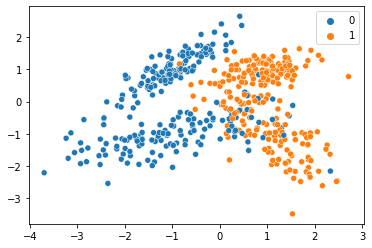

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

Adding a column of 1's to $X$ to take into account the zero intercept

In [ ]:
x = np.hstack([np.ones((X.shape[0], 1)), X])

In [ ]:
[x[:5,:],x[-5:,:]] # Plot the first and last 5 lines of x, now containing features x0 (constant=1), x1 and x2

[array([[ 1.        ,  2.25698215, -1.34710915],
        [ 1.        ,  1.43699308,  1.28420453],
        [ 1.        ,  0.57927295,  0.23690172],
        [ 1.        ,  0.42538132, -0.24611145],
        [ 1.        ,  1.13485101, -0.61162683]]),
 array([[ 1.        ,  1.56638944,  0.81749944],
        [ 1.        , -1.94913831, -1.90601147],
        [ 1.        ,  1.53440506, -0.11687238],
        [ 1.        , -0.39243599,  1.39209018],
        [ 1.        , -0.11881249,  0.96973739]])]

In [ ]:
[y[:5],y[-5:]] # Plot the first and last 5 lines of y

[array([1, 1, 1, 0, 1]), array([1, 0, 0, 0, 1])]

Define the sigmoid function "sigmoid", the function to compute the gradient of the log likelihood  "grad_l" and the gradient ascent algorithm.

################# Do not write above this line #################

In [ ]:
def sigmoid(x):
    '''
    Function to compute the sigmoid of a given input x.
    
    Input:
    x: it's the input data matrix. The shape is (N, H)

    Output:
    g: The sigmoid of the input x
    '''
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    g = 1/(1 + np.exp(-x))

    return g

def log_likelihood(theta,features,target):
    '''
    Function to compute the log likehood of theta according to data x and label y
    
    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    target: the label array
    
    Output:
    log_g: the log likehood of theta according to data x and label y
    '''
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################



    theta = theta.reshape(-1,1)
    target = target.reshape(-1,1)

    preds = sigmoid(features @ theta )


    log_l = np.mean(target * np.log(preds) + (1 - target) * np.log(1 - preds))
    

    return log_l


def predictions(features, theta):
    '''
    Function to compute the predictions for the input features
    
    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    
    Output:
    preds: the predictions of the input features
    '''
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    # theta = theta.reshape(-1,1)
    preds = sigmoid(features @ theta)
    preds = preds.reshape(-1,1)

    return preds


def update_theta(theta, target, preds, features, lr):
    '''
    Function to compute the gradient of the log likelihood
    and then return the updated weights

    Input:
    theta: the model parameter matrix.
    target: the label array
    preds: the predictions of the input features
    features: it's the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the updated model parameter matrix.
    '''
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    theta = theta.reshape(-1,1)
    target = target.reshape(-1,1)

    error = target - preds
   
    theta =  theta + lr *  (features.T @ error )/len(features)

    return theta 

def gradient_ascent(theta, features, target, lr, num_steps):
    '''
    Function to execute the gradient ascent algorithm

    Input:
    theta: the model parameter matrix.
    target: the label array
    num_steps: the number of iterations 
    features: the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the final model parameter matrix.
    log_likelihood_history: the values of the log likelihood during the process
    '''

    log_likelihood_history = np.zeros(num_steps)
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################

    log_l = log_likelihood(theta,features,target)
    log_likelihood_history[0] = log_l

    for i in range(1,num_steps):
        preds = predictions(features,theta)
        theta =  update_theta(theta, target,preds,features,lr)


        log_l = log_likelihood(theta,features,target)
        log_likelihood_history[i] = log_l


    return theta, log_likelihood_history


################# Do not write below this line #################

Check your grad_l implementation:
grad_l applied to the theta_test (defined below) should provide a value for log_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.

In [ ]:
target_value = -1.630501731599431

output_test  = log_likelihood(np.array([-7,4,1]),x,y)
error_test=np.abs(output_test-target_value)

print("{:f}".format(error_test))

0.000000


Let's now apply the function gradient_ascent and print the final theta as well as theta_history 

In [ ]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
n_iter=1000
theta_final, log_l_history = gradient_ascent(theta0,x,y,lr=0.5,num_steps=n_iter)
print(theta_final)


[[-0.4609704 ]
 [ 2.90036396]
 [ 0.23146845]]


Let's plot the log likelihood over iterations


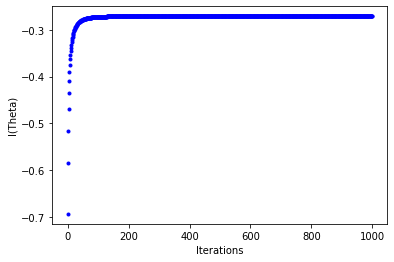

In [ ]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

Plot the data and the decision boundary:

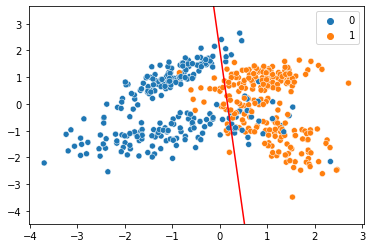

In [ ]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(X[:,0].min(),X[:,1].max(),2)

# Plot raw data
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X)

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red")
plt.ylim(X[:,1].min()-1,X[:,1].max()+1)
# Save the theta_final value for later comparisons
theta_GA = theta_final.copy()

################# Do not write above this line #################

Discuss these two points:
1. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
2. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results? 

################# Do not write below this line #################


## Question 2: Logistic Regression with non linear boundaries (7 points)

#### Exercise 2.a **(4 Points)** Polynomial features for logistic regression

Define new features, e.g. of 2nd and 3rd degrees, and learn a logistic regression classifier by using the new features, by using the gradient ascent optimization algorithm you defined in Question 1.

In particular, we would consider a polynomial boundary with equation:

$f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2$

We would therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking x and the new 7 features (in the order x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2). In particular create x_new_quad by additionally stacking with x the quadratic features, and x_new_cubic by additionally stacking with x the quadratic and the cubic features.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=5)
X.shape, y.shape

((500, 2), (500,))

In [ ]:
x = np.hstack([np.ones((X.shape[0], 1)), X])

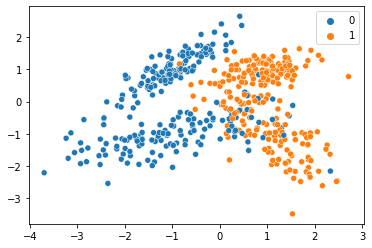

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

In [ ]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:,1]
x2 = x[:,2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)
print(x[:5,:]) # For visualization of the first 5 values
print(x1[:5,:]) # For visualization of the first 5 values
print(x2[:5,:]) # For visualization of the first 5 values

[[ 1.          2.25698215 -1.34710915]
 [ 1.          1.43699308  1.28420453]
 [ 1.          0.57927295  0.23690172]
 [ 1.          0.42538132 -0.24611145]
 [ 1.          1.13485101 -0.61162683]]
[[2.25698215]
 [1.43699308]
 [0.57927295]
 [0.42538132]
 [1.13485101]]
[[-1.34710915]
 [ 1.28420453]
 [ 0.23690172]
 [-0.24611145]
 [-0.61162683]]


################# Do not write above this line #################

Your code here

In [ ]:

def new_features(x, degree=2):
    '''
    Function to create n-degree features from the input 

    Input:
    x: the initial features
    degree: the maximum degree you wantthe features
    
    Output:
    features: the final features. 
              2nd degree features must have the order [x, x1x1, x1x2, x2x2]
              2nd degree features must have the order [x, x1x1, x1x2, x2x2, x1x1x1, x1x1x2, x1x2x2, x2x2x2]
    '''
    
    features = np.ones(x[:,1].shape[0])

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    import itertools

    final_features = x

    for deg in range(2,degree+1):
      combinations = list(itertools.combinations_with_replacement([1,2],deg))
      features = np.ones((x.shape[0],len(combinations)))
      
      for i,comb in enumerate(combinations) :
        x_new = np.ones(x.shape[0])
        for elmt in comb:
          x_new *= x[:,elmt].reshape(-1)
        features[:,i]= x_new
    
      final_features = np.hstack([final_features,features])
      
    return final_features


################# Do not write below this line #################

In [ ]:
x_new_quad = new_features(x, degree=2)
x_new_cubic = new_features(x, degree=3)

#reordering output features
temp = np.copy(x_new_quad[:, -1])
x_new_quad[:, -1] = x_new_quad[:, -2]
x_new_quad[:, -2] = temp

temp = np.copy(x_new_cubic[:, -1])
x_new_cubic[:, -1] = x_new_cubic[:, -2]
x_new_cubic[:, -2] = x_new_cubic[:, -3]
x_new_cubic[:, -3] = temp


Now use the gradient ascent optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

In [ ]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

theta_final_quad, log_l_history_quad = gradient_ascent(theta0_quad,x_new_quad,y,lr=0.5,num_steps=n_iter)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, log_l_history_cubic = gradient_ascent(theta0_cubic,x_new_cubic,y,lr=0.5,num_steps=n_iter)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)

[[ 0.07547745]
 [ 3.32395055]
 [ 0.27105752]
 [-0.51870912]
 [-0.34088187]
 [-0.04844524]]
[[ 0.82387937]
 [ 2.41932681]
 [ 1.66023032]
 [-1.13894781]
 [-0.20619864]
 [-0.96064765]
 [ 0.34379452]
 [-0.64071879]
 [ 0.9512835 ]
 [ 1.40930421]]


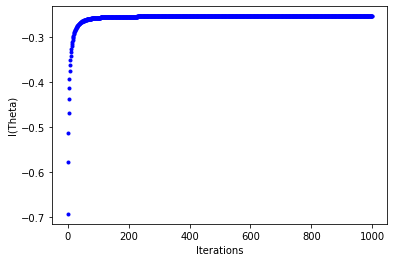

In [ ]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history_quad)),log_l_history_quad,'b.')

#### Exercise 2.b **(3 Points)** Plot the computed non-linear boundary and discuss the questions



First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

################# Do not write above this line #################

Your code here

In [ ]:
def boundary_function(x1_vec, x2_vec, theta_final):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    
    if len(theta_final) == 6:
        # boundary function value for features up to quadratic
        c_0, c_1, c_2, c_3, c_4, c_5 = theta_final
        f =  c_0*1 + c_1*(x1_vec) + c_2*(x2_vec) + c_3*(x1_vec)**2 + c_4*(x2_vec)**2 + c_5*(x1_vec*x2_vec)
    
        

    elif len(theta_final) == 10:
        # boundary function value for features up to cubic
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9 = theta_final
        f=c_0*1+c_1*(x1_vec)+c_2*(x2_vec)+c_3*(x1_vec)**2+c_4*(x2_vec)**2+c_5*(x1_vec*x2_vec)+c_6*(x1_vec)**3+c_7*(x2_vec)**3+c_8*(x1_vec**2)*(x2_vec) +c_9*x1_vec*(x2_vec)**2  
       
    else:
        raise("Number of Parameters is not correct")
        
    return x1_vec, x2_vec, f

################# Do not write below this line #################

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

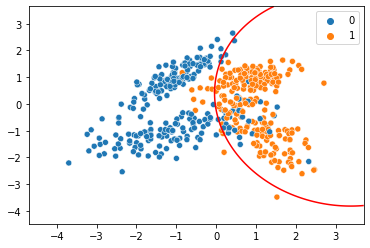

In [ ]:
x1_vec = np.linspace(X[:,0].min()-1,X[:,0].max()+1,200);
x2_vec = np.linspace(X[:,1].min()-1,X[:,1].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.show()

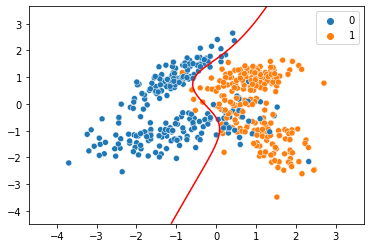

In [ ]:
x1_vec = np.linspace(X[:,0].min()-1,X[:,0].max()+1,200);
x2_vec = np.linspace(X[:,1].min()-1,X[:,1].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.show()

#### Confusion Matrix

Here you can see the confusion matrices related to the three models you've implemented. 


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
## logistic regression with linear buondary

z = np.dot(x,theta_final)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
confusion_matrix(y, y_hat)

array([[218,  35],
       [ 22, 225]])

In [ ]:
## logistic regression with non linear buondary - quadratic

z = np.dot(x_new_quad,theta_final_quad)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
confusion_matrix(y, y_hat)

array([[220,  33],
       [ 15, 232]])

In [ ]:
## logistic regression with non linear buondary - cubic

z = np.dot(x_new_cubic,theta_final_cubic)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
confusion_matrix(y, y_hat)

array([[225,  28],
       [ 11, 236]])

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
- Let's now delve into some quantitative analysis. The three tables you have generated represent the confusion matrix for the model you have implemented in the first two questions. What can you say about actual performances? Does the increase of the degree have a high effect on the results? 


################# Do not write below this line #################


## Question 3: Multinomial Classification (Softmax Regression) **(13 Points)**

### Code and Theory **(10 Points)**
### Report **(3 Points)**

#### Exercise 3.a **(4 Points)**

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{equation}
s_i =  X_i \theta
\end{equation}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{equation}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{equation}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

################# Do not write above this line #################

Your equations here.

\begin{equation}
L(\theta) = ...
\end{equation}


\begin{equation}
\nabla_{\theta_k} L(\theta) = ...
\end{equation}

################# Do not write below this line #################

#### Exercise 3.b **(4 Points)**

Now we will implement the code for the equations. Let's implement the functions:
-  softmax 
-  CELoss
-  CELoss gradient
-  gradient descent

We generate a toy dataset with *sklearn* library. Do not change anything outside the parts provided of your own code (else the provided checkpoint will not work).

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=300, n_features=7, n_informative=7, n_redundant=0, n_classes=3, random_state=1)
X.shape, y.shape

((300, 7), (300,))

As a hint for the implementations of your functions: consider the labels $y$ as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).

In [ ]:
import scipy
import numpy as np

def class2OneHot(vec):
    out_sparse = scipy.sparse.csr_matrix((np.ones(vec.shape[0]), (vec, np.array(range(vec.shape[0])))))
    out_onehot = np.array(out_sparse.todense()).T
    return out_onehot

y_onehot = class2OneHot(y)

Let's visualize the generated dataset. We use as visualizzation method the *Principal Component Analysis* (PCA). PCA summarize the high-dimensional feature vectors of each sample into 2  features, which we can illustrate with a 2D plot. Look at the following plot, the 3 generated classes do not seem separable.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['target'])], axis = 1)

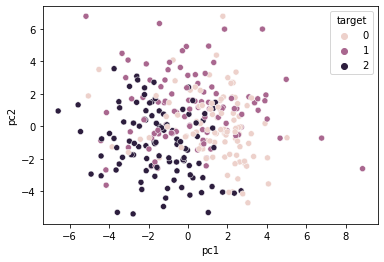

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='pc1', y='pc2', hue='target', data=finalDf);

################# Do not write above this line #################

In [ ]:
def softmax(theta, X):
    '''
    Function to compute associated probability for each sample and each class.
    
    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)

    Output:
    softmax: it's the matrix containing probability for each sample and each class. The shape is (N, K)
    '''
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    return softmax


def CELoss(theta, X, y_onehot):
    '''
    Function to compute softmax regression model and Cross Entropy loss.
    
    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Output:
    loss: The scalar that is the mean error for each sample.
    '''
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    return loss


def CELoss_jacobian(theta, X, y_onehot):
    '''
    Function to compute gradient of the cross entropy loss with respect the parameters.
    
    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Output:
    jacobian: A matrix with the partial derivatives of the loss. The shape is (H, K)
    '''
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    return jacobian


def gradient_descent(theta, X, y_onehot, alpha=0.01, iterations=100):
    '''
    Function to compute gradient of the cross entropy loss with respect the parameters.
    
    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)
    alpha: it's the learning rate, so it determines the speed of each step of the GD algorithm
    iterations: it's the total number of step the algorithm performs

    Output:
    theta: it's the updated matrix of the parameters after all the iterations of the optimization algorithm. The shape is (H, K)
    loss_history: it's an array with the computed loss after each iteration
    '''

    # We initialize an empty array to be filled with loss value after each iteration
    loss_history = np.zeros(iterations)
    
    # With a for loop we compute the steps of GD algo
    for it in range(iterations):
        
        #####################################################
        ##                 YOUR CODE HERE                  ##
        #####################################################
        
    return theta, loss_history

IndentationError: ignored

################# Do not write below this line #################

In [ ]:
# Initialize a theta matrix with random parameters
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))

print("Initial Loss with initialized theta is:", CELoss(theta0, X, y_onehot))

# Run Gradient Descent method
n_iter = 1000
theta_final, log_l_history = gradient_descent(theta0, X, y_onehot, alpha=0.01, iterations=n_iter)

In [ ]:
theta_final

In [ ]:
loss = CELoss(theta_final, X, y_onehot)
loss

In [ ]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('loss')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)), log_l_history,'b.')

#### Exercise 3.c **(2 Points)**

Let's now evaluate the goodness of the learnt based on accuracy:

\begin{equation}
Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions}
\end{equation}

Implement the compute_accuracy function. You may compare the accuracy achieved with learnt model Vs. a random model (random $\Theta$) or one based on $\Theta$'s filled with zeros.

################# Do not write above this line #################

In [ ]:
def compute_accuracy(theta, X, y):
    '''
    Function to compute accuracy metrics of the softmax regression model.
    
    Input:
    theta: it's the final parameter matrix. The one we learned after all the iterations of the GD algorithm. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y: it's the label array. The shape is (N, 1)

    Output:
    accuracy: Score of the accuracy.
    '''
    
    return accuracy

################# Do not write below this line #################

In [ ]:
compute_accuracy(theta_final, X, y)

In [ ]:
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))
compute_accuracy(theta0, X, y)

In [ ]:
compute_accuracy(np.zeros((X.shape[1], len(np.unique(y)))), X, y)

### Report **(3 Points)**

Experiment with different values for the learning rate $\alpha$ and the number of iterations. Look how the loss plot changes the convergence rate and the resulting accuracy metric. Report also execution time of each run. For this last step you could you %%time at the beginning of the cell to display time needed for the algorithm.

In [ ]:
%%time

# Initialize a theta matrix with random parameters
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))

print("Initial Loss with initialized theta is:", CELoss(theta0, X, y_onehot))

# Run Gradient Descent method
n_iter = 100
theta_final, log_l_history = gradient_descent(theta0, X, y_onehot, alpha=0.001, iterations=n_iter)

**Write your Report here**


| LR | Iter | Accuracy | Time |
|---|---|---|---|
|  |  |  |  |
|  |  |  |  |
|  |  |  |  |
| ... |  |  |  |


## Question 4: Multinomial Naive Bayes **(6 Points)**

### Code and Theory

The Naive Bayes classifier is a probabilistic machine learning model often used for classification tasks, e.g. document classification problems.

In the multinomial Naive Bayes classification you generally have $K>2$ classes, and the features are assumed to be generated from a multinomial distribution.

##### __*Example Data*__
General models consider input data as values. In the case of MultinomialNB, being used mainly in the field of document classification, these data consider how many features $X_i$ are present in the sample. Basically, it is a count of features within each document.

Taking into account $D=3$ documents and a vocabulary consisting of $N=4$ words, the data are considered as follows.

|  | $w_1$ | $w_2$ | $w_3$ | $w_4$ |
|---|---|---|---|---|
| $d_1$  | 3 | 0 | 1 | 1 |
| $d_2$ | 2 | 1 | 3 |0|
| $d_3$ | 2 | 2 | 0 |2|

By randomly generating the class to which each document belongs we have $y=[1,0,1]$



##### __*A bit of notation*__
- $Y =\{y_1, y_2, ... , y_{|Y|}\}$: set of classes

- $V =\{w_1, w_2, ... , w_{|V|}\}$: set of vocabulary

-  $D =\{d_1, d_2, ... , d_{|D|}\}$: set of documents 

-  $N_{yi}$:  count of a specific word $w_i$ in each unique class, e.g. for $y=1$ you select $D_1$ and $D_3$, then for third column  you have $N_{y,3}=1$ 
-  $N_y$: total count of features for a specific class, e.g. for $y=1$ you sum all rows values which the correspondent label is 1, so $N_y=11$ 

-  $n$: total number of features (words in vocabulary)
-  $\alpha$: smoothing parameters

##### __*Task*__
Find the class $y$ to which the document is most likely to belong given the words $w$.
Use the Bayes formula and the posterior probability for it.

Bayes Formula:
\begin{equation}
P(A|B) = \frac{P(A)*P(B|A)}{P(B)}
\end{equation}

Where:
- P(A): Prior probability of A
- P(B): Prior probability of B
- P(B|A): Likelihood, multiplying posterior probability, that is multinomial Naive Bayes is:
\begin{equation}
P(B|A) = \left(\frac{N_{yi}+\alpha}{N_{y}+\alpha*n\_features}\right)^{X_{doc,i}}
\end{equation}


**Reminder: do not change any part of this notebook outside the assigned work spaces**

#### Generate random dataset


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=300, n_features=7, n_informative=7, n_redundant=0, n_classes=3, random_state=1)
X = np.floor(X)-np.min(np.floor(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

#### Step0: $N_y$ and $N_{yi}$

In [ ]:
def feature_count(X, y, classes, n_classes, n_features):
        '''
        Function to compute the count of a specific word in each unique class and the total count.
        
        Input:
        X: it's the input data matrix.
        y: label array
        classes: unique values of y
        n_classes: number of classes
        n_features: it's the number of word in Vocabulary.

        Output:
        N_yi:   count of a specific word $w_i$ in each unique class
        N_y: total count of features for a specific class
        '''
        N_yi = np.zeros((n_classes, n_features)) # feature count
        N_y = np.zeros((n_classes)) # total count 

        #####################################################
        ##                 YOUR CODE HERE                  ##
        #####################################################
        
        return N_yi, N_y

In [ ]:
n_samples_train, n_features = X_train.shape
classes = np.unique(y_train)
n_classes = 3
alpha = 0.1

N_yi, N_y = feature_count(X_train, y_train, classes, n_classes, n_features)

#### Step1: Prior Probability
The probability of a document being in a specific category from the given set of documents.

######################################

Your equations here:
\begin{equation}
P(y_j) = ...
\end{equation}

######################################


In [ ]:
def prior_(X, y, n_classes, n_samples):
        """
        Calculates prior for each unique class in y.

        Input:
        X: it's the input data matrix.
        y: label array
        n_classes: number of classes
        n_samples: number of documents

        Output:
        P: prior probability for each class. Shape: (, n_classes)
        """
        classes = np.unique(y)
        P = np.zeros(n_classes)

        # Implement Prior Probability P(A)
        #####################################################
        ##                 YOUR CODE HERE                  ##
        #####################################################

        return P

In [ ]:
prior_prob = prior_(X_train, y_train, n_classes, n_samples_train)
print(prior_prob)

#### Step2
Posterior Probability: The conditional probability of a word occurring in a document given that the document belongs to a particular category.

\begin{equation}
P(w_i|y_j) = \left(\frac{N_{yi}+\alpha}{N_{y}+\alpha*n\_features}\right)^{X_{doc,i}}
\end{equation}


Likelihood for a single document: 
######################################

Your equations here:
\begin{equation}
P(w|y_j) = ...
\end{equation}

######################################


In [ ]:
def posterior_(x_i, i, h, N_y, N_yi, n_features, alpha):
        """
        Calculates posterior probability. aka P(w_i|y_j) using equation in the notebook.
        
        Input:
        x_i: feature x_i
        i: feature index.  
        h: a class in y
        N_yi:   count of a specific word in each unique class
        N_y: total count of features for a specific class
        n_features: it's the number of word in Vocabulary.
        alpha: smoothing parameter

        Output:
        posterior: P(xi | y). Float.
        """

        # Implement Posterior Probability
        #####################################################
        ##                 YOUR CODE HERE                  ##
        #####################################################
        return posterior
    
def likelihood_(x, h, N_y, N_yi, n_features, alpha):
        """
        Calculates Likelihood P(w|j_i).
        
        Input:
        x: a row of test data. Shape(n_features,)
        h: a class in y
        N_yi:   count of a specific word in each unique class
        N_y: total count of features for a specific class
        n_features: it's the number of word in Vocabulary.
        alpha: smoothing parameter

        Output:
        likelihood: Float.
        """
        
        tmp = []
        for i in range(x.shape[0]):
            tmp.append(posterior_(x[i], i, h, N_y, N_yi, n_features, alpha))

        # Implement Likelihood
        #####################################################
        ##                 YOUR CODE HERE                  ##
        #####################################################
        
        return likelihood

In [ ]:
# Example of likelihood for first document
likelihood_(X_test[0], 0, N_y, N_yi, n_features, alpha)

#### Step3
Joint Likelihood that, given the words, the documents belongs to specific class
######################################

Your equations here:
\begin{equation}
P(y_i|w) = ...
\end{equation}

######################################

Finally, from the probability that the document is in that class given the words, take the argument correspond to max value.

\begin{equation}
y(D) = argmax_{y \in Y} \frac{P(y|w)}{\sum_{j}P(y_j|w)}
\end{equation}

In [ ]:
def joint_likelihood(X, prior_prob, classes, n_classes, N_y, N_yi, n_features, alpha):
        """
        Calculates the joint probability P(y_i|w) for each class and makes it probability.
        Then take the argmax.
        
        Input:
        X: test data
        prior_prob:
        classes:
        n_classes:
        N_yi:   count of a specific word in each unique class
        N_y: total count of features for a specific class
        n_features: it's the number of word in Vocabulary.
        alpha: smoothing parameter

        Output:
        predicted_class: Predicted class of the documents. Int. Shape: (,#documents)
        """
        samples, features = X.shape
        predict_proba = np.zeros((samples,n_classes)) 
        
        # Calculate Joint Likelihood of each row for each class, then normalize in order to make them probabilities
        # Finally take the argmax to have the predicted class for each document
        #####################################################
        ##                 YOUR CODE HERE                  ##
        #####################################################
        
        return predicted_class

In [ ]:
yhat = joint_likelihood(X_test, prior_prob, classes, n_classes, N_y, N_yi, n_features, alpha)

#### Step4: Calculate the Accuracy Score

In [ ]:
print('Accuracy: ', np.round(accuracy_score(yhat, y_test),3))

**Sanity Check**

Here we use a function from the sklearn library, one of the most widely used in machine learning. MultinomialNB() implements the required algorithm, so the result of your implementation should be equal to the output of the following function.

In [ ]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB(alpha=0.1)
clf.fit(X_train,y_train)
sk_y = clf.predict(X_test)
print('Accuracy: ', np.round(accuracy_score(sk_y, y_test),3))